In [ ]:
import numpy as np
import pandas as pd

В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

1.Получите и загрузите данные.

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2.Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [ ]:
df_not_cabin = df[~df['Cabin'].isna()]
df_not_cabin.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            19
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        2
dtype: int64

In [ ]:
df_not_cabin_age = df_not_cabin[~df_not_cabin['Age'].isna()]
df_not_cabin_age.isna().sum()
df_not_nan = df_not_cabin_age[~df_not_cabin_age['Embarked'].isna()]
df_not_nan.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df_not_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

y = df_not_nan['Survived']
X = df_not_nan[['Age','SibSp', 'Parch','Fare',]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
before_log = LogisticRegression()
before_log.fit(X_train,y_train)


reg_lin_not_nan = LinearRegression().fit(X_train, y_train)
print('Weights: {}'.format(reg_lin_not_nan.coef_))
print('Bias: {}'.format(reg_lin_not_nan.intercept_))
pred_values = reg_lin_not_nan.predict(X)
print('Error_all: {}'.format(mean_absolute_error(pred_values, y)))
print('Error_train: {}'.format(mean_absolute_error(reg_lin_not_nan.predict(X_train), y_train)))
print('Error_test: {}'.format(mean_absolute_error(reg_lin_not_nan.predict(X_test), y_test)))
print('----score-------------')
score_before = []
accuracy_before = []

s = reg_lin_not_nan.score(X,y)
score_before.append(s)
accuracy_before.append(before_log.score(X,y))
print(f'score_not_nan_all:{s}')
s = reg_lin_not_nan.score(X_train,y_train)
score_before.append(s)
accuracy_before.append(before_log.score(X_train,y_train))
print(f'score_not_nan_train:{s}')
s = reg_lin_not_nan.score(X_test,y_test)
score_before.append(s)
accuracy_before.append(before_log.score(X_test,y_test))
print(f'score_not_nan_test:{s}')



Weights: [-0.00606067  0.00838208 -0.06492659  0.00095578]
Bias: 0.853639985587088
Error_all: 0.4069927827083359
Error_train: 0.407987746569035
Error_test: 0.4030667090958473
----score-------------
score_not_nan_all:0.08215814926281939
score_not_nan_train:0.06078490100015832
score_not_nan_test:0.14705839797366804


3.Снова загрузите полные данные.

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()
df.info()
# len(df['Cabin'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


4.Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

In [ ]:
# логически номер билета и кабины не помогут в построении модели. 
# PassengerId - только путать будет модель
# пункт отправления также не даёт очевидной логической связи для выживания ???
# от имени и титула нет толка - это уже корррелировано с полом и возрастом должно быть
y = df['Survived']
X = df[['Pclass','Sex','Age', 'SibSp','Parch','Fare', 'Embarked']]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


5.Проверьте данные на наличие пропущенных значений.
a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы

In [ ]:
X.isna().sum().sum() *100/ (X.shape[0] * X.shape[1])
# 3% будет потеряно

2.8699695366362032

In [ ]:
X['Age'] = X['Age'].fillna(X['Age'].mean())
X['Embarked'] = X['Embarked'].fillna('S')
X.isna().sum()
# X['Sex'].unique()

<ipython-input-13-f69c8fac2e72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = X['Age'].fillna(X['Age'].mean())
<ipython-input-13-f69c8fac2e72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = X['Embarked'].fillna('S')


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

6.Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [ ]:
selected_col = ['Sex', 'Embarked']
X_dum = pd.get_dummies(X, columns = selected_col, drop_first=True)
X_dum.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


7.Проверьте данные на наличие выбросов.
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

In [ ]:
X_dum.describe()
# выбросов не обнаружено

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.086420,0.725028
std,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.281141,0.446751
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


8.*Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

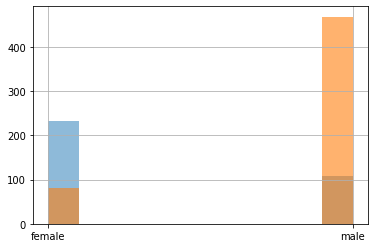

In [ ]:
df[df['Survived'] == 1]['Sex'].hist(alpha=0.5) #синее - выжили
df[df['Survived'] == 0]['Sex'].hist(alpha=0.6) #
# женщин спаслось больше
# относительно пола женщин так же спаслось больше
# => пол очень важен для результата

In [ ]:
X_dum[X_dum['Sex_male'] == 0]

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
1,1,38.000000,1,0,71.2833,0,0,0
2,3,26.000000,0,0,7.9250,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1
8,3,27.000000,0,2,11.1333,0,0,1
9,2,14.000000,1,0,30.0708,0,0,0
...,...,...,...,...,...,...,...,...
880,2,25.000000,0,1,26.0000,0,0,1
882,3,22.000000,0,0,10.5167,0,0,1
885,3,39.000000,0,5,29.1250,0,1,0
887,1,19.000000,0,0,30.0000,0,0,1


9.*Попробуйте математически преобразовать признак Age.

In [ ]:
X_dum['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [ ]:
X_dum['Age'].max(), X_dum['Age'].min()

(80.0, 0.42)

In [ ]:
# непонятно что значит
# допустим это про масштабирование
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()


d = min_max_scaler.fit_transform(X_dum)
name = X_dum.columns
scaled_X = pd.DataFrame(d, columns=name)
X_dum['Age'] = scaled_X['Age']
X_dum['Fare'] = scaled_X['Fare']
# X_dum['Age']
X_dum.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,0.271174,1,0,0.014151,1,0,1
1,1,0.472229,1,0,0.139136,0,0,0
2,3,0.321438,0,0,0.015469,0,0,1
3,1,0.434531,1,0,0.103644,0,0,1
4,3,0.434531,0,0,0.015713,1,0,1


In [ ]:
X_dum['Age'].max(), X_dum['Age'].min() 

(1.0, 0.0)

10.Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [ ]:
# y = df_not_nan['Survived']
X = X_dum
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_lin_not_nan = LinearRegression().fit(X_train, y_train)
after_log = LogisticRegression()
after_log.fit(X_train,y_train)
print('Weights: {}'.format(reg_lin_not_nan.coef_))
print('Bias: {}'.format(reg_lin_not_nan.intercept_))
pred_values = reg_lin_not_nan.predict(X)
print('Error_all: {}'.format(mean_absolute_error(pred_values, y)))
print('Error_train: {}'.format(mean_absolute_error(reg_lin_not_nan.predict(X_train), y_train)))
print('Error_test: {}'.format(mean_absolute_error(reg_lin_not_nan.predict(X_test), y_test)))
print('----score-------------')
score_after = []
after_ac = []

s = reg_lin_not_nan.score(X,y)
score_after.append(s)
after_ac.append(after_log.score(X,y))
print(f'score_not_nan_all:{s}')
s = reg_lin_not_nan.score(X_train,y_train)
score_after.append(s)
after_ac.append(after_log.score(X_train,y_train))
print(f'score_not_nan_train:{s}')
s = reg_lin_not_nan.score(X_test,y_test)
score_after.append(s)
after_ac.append(after_log.score(X_test,y_test))
print(f'score_not_nan_test:{s}')


Weights: [-0.15459486 -0.38111993 -0.0387913  -0.0200731   0.18114141 -0.51338199
 -0.02153833 -0.07218932]
Bias: 1.2856010949394348
Error_all: 0.2930287142302742
Error_train: 0.295031029874326
Error_test: 0.2850641961377332
----score-------------
score_not_nan_all:0.39718927976179164
score_not_nan_train:0.3845118957517022
score_not_nan_test:0.443278345021483


In [ ]:
for i in range(len(score_after)):
  print(score_after[i] - score_before[i])
print('**********log_regress************')
for i in range(len(after_ac)):
  print(after_ac[i] - accuracy_before[i])
  # [print(score_after[i] - score_before[i]) for i in range(len(score_after))]

0.31503113049897224
0.3237269947515439
0.29621994704781496
**********log_regress************
0.08662214126695
0.07734338925657991
0.12320700588857014


In [ ]:
accuracy_before

[0.7158469945355191, 0.726027397260274, 0.6756756756756757]

11.Сформулируйте выводы по проделанной работе.
a) Кратко опишите какие преобразования были сделаны и почему.
b) Сравните метрики моделей из п. 2 и п. 10.
c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?
Для получения зачета по этому домашнему заданию, минимально, должно быть построено две модели, выведена одна метрика для каждой. В данных должны быть обработаны пропуски и категориальные значения.

In [ ]:
# a) 1.были выбраны более информативные с логической точки зрения столбцы
# 2. для упрощения работы модели были Категориальные переменные переведенны в цифровые значения
# 3. были масштабированы значения возраста и цены билета, что б разница значений не смущала мою модель

# b) точность предсказания выросла на 30% после обработки данных
# с) данные обработаны не зря, новая модель значительно выросла в точности

Результат: применены на практике основные методы разведочного анализа данных (exploratory data analysis, EDA). Проведена оценка качества данных.